In [8]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mne
from mne.preprocessing import ICA

In [11]:
data_dir = Path("../data/first_dataset_fif")
fif_files = sorted(data_dir.glob("*.fif"))

print(f"🔍 {len(fif_files)} FIF files found:")
for f in fif_files:
    print(f.name)

🔍 20 FIF files found:
block_01_raw.fif
block_02_raw.fif
block_03_raw.fif
block_04_raw.fif
block_05_raw.fif
block_06_raw.fif
block_07_raw.fif
block_08_raw.fif
block_09_raw.fif
block_10_raw.fif
block_11_raw.fif
block_12_raw.fif
block_13_raw.fif
block_14_raw.fif
block_15_raw.fif
block_16_raw.fif
block_17_raw.fif
block_18_raw.fif
block_19_raw.fif
block_20_raw.fif


In [13]:
# Load the desired block
raw = mne.io.read_raw_fif(fif_files[18], preload=True)

# Visualize the first seconds of the signal
raw.plot(n_channels=14, scalings='auto', title="EEG - Block 18", duration=10)

Opening raw data file ../data/first_dataset_fif/block_19_raw.fif...
    Range : 0 ... 14130 =      0.000 ...   113.040 secs
Ready.
Reading 0 ... 14130  =      0.000 ...   113.040 secs...
Using pyopengl with version 3.1.9


Channels marked as bad:
none


<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, C3, C4, T3, T4, O1, O2, F3, F4, Fz, Pz, P3, P4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 14
 projs: []
 sfreq: 125.0 Hz
>


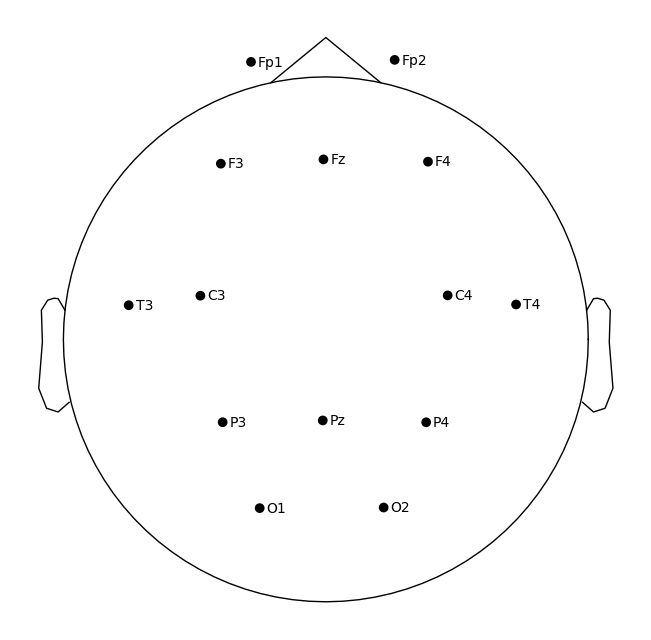

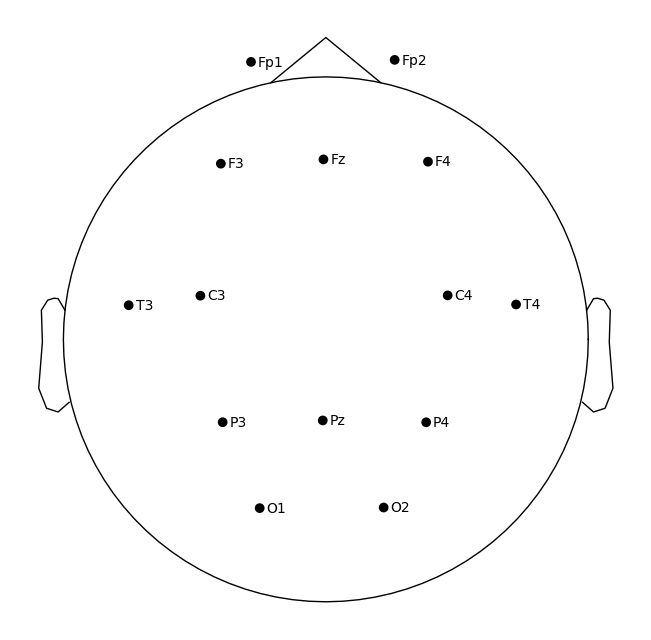

In [14]:
# Basic information
print(raw.info)

# Visualize electrode layout
raw.plot_sensors(kind='topomap', show_names=True)


Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.1s.


/var/folders/ny/tk1xvwsn7n11pkl0vlgl1sz80000gn/T/ipykernel_72560/408568501.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


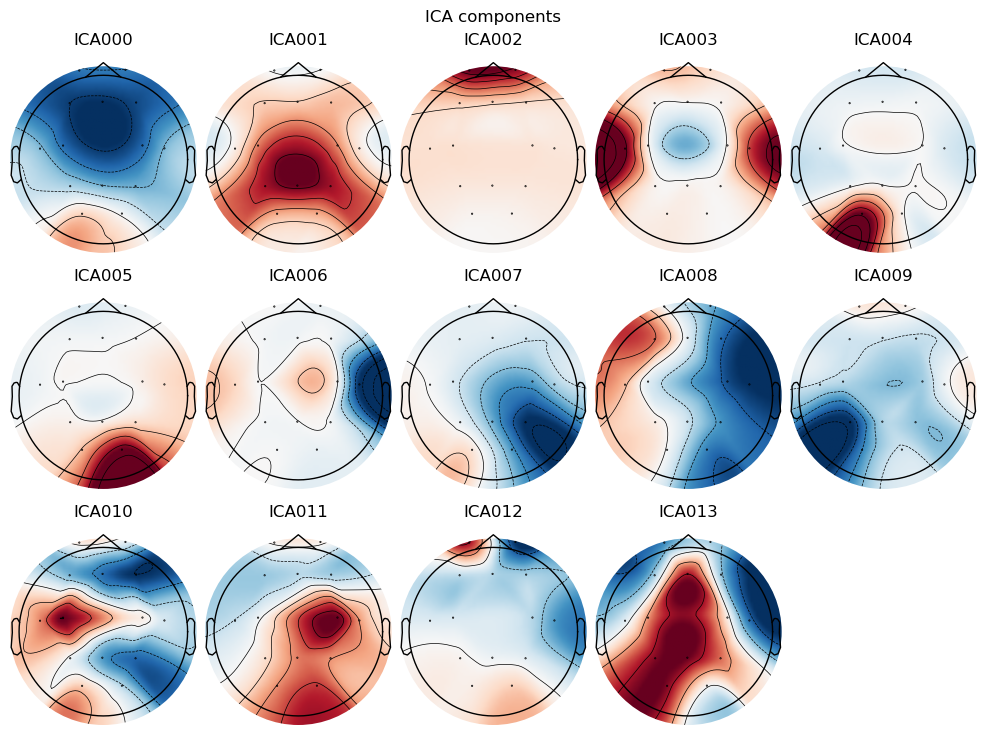

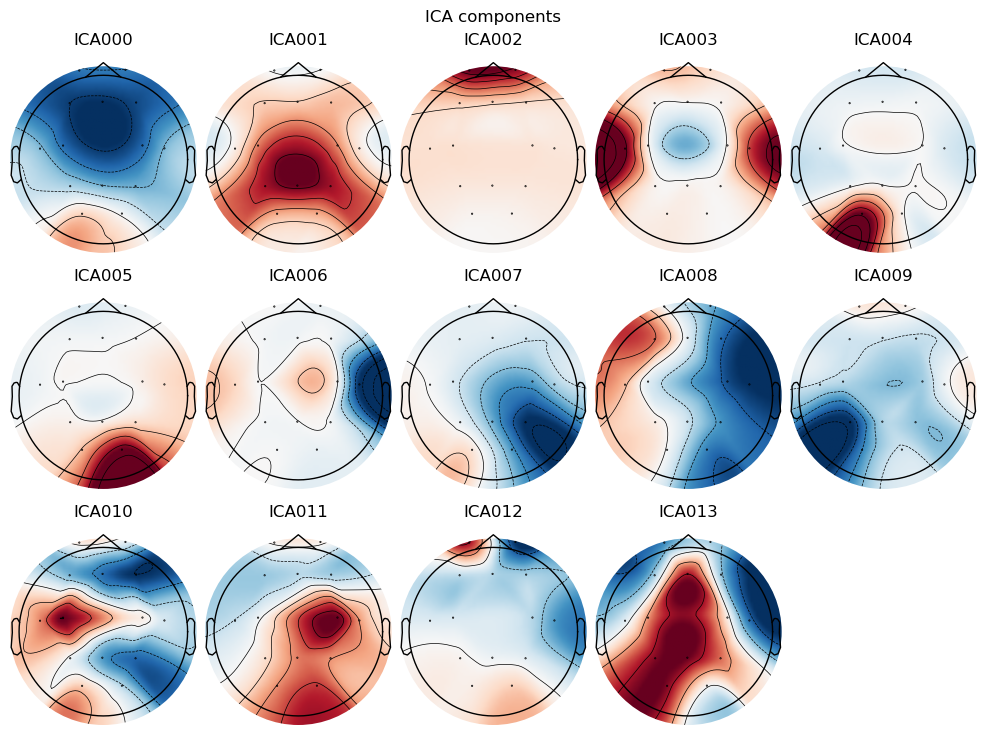

In [17]:
from mne.preprocessing import ICA

# ICA with 14 components (one per channel)
ica = ICA(n_components=14, random_state=42, max_iter='auto')
ica.fit(raw)

# Visualize components (topography)
ica.plot_components()

In [18]:
ica.plot_sources(raw)

Creating RawArray with float64 data, n_channels=14, n_times=14131
    Range : 0 ... 14130 =      0.000 ...   113.040 secs
Ready.
Using pyopengl with version 3.1.9


In [19]:
ica.exclude = [0, 1, 2, 4]

In [20]:
# Apply cleaning to the original signal
raw_clean = ica.apply(raw.copy())

# Visualize the cleaned EEG
raw_clean.plot(n_channels=14, scalings='auto', title="Clean EEG - after ICA removal")


Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 4 ICA components
    Projecting back using 14 PCA components
Using pyopengl with version 3.1.9


Channels marked as bad:
none
